# Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('Dataset')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


# Store data, labels in the list

In [2]:
data = []
labels = []

classes = 43    # We have 43 Classes
cur_path = os.getcwd()

# Preprocess the images


In [3]:
cur_path

'C:\\Users\\awaje\\Traffic-Sign-Detection-\\Dataset'

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

# Converting lists into numpy arrays

In [5]:
data = np.array(data)
labels = np.array(labels)

# Save Labels & Data for future use

In [6]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Splitting training and testing dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Converting the labels into one hot encoding

In [8]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# The model

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 53s 54ms/step - loss: 3.4909 - accuracy: 0.0574 - val_loss: 3.4800 - val_accuracy: 0.0574
Epoch 2/15
981/981 [==============================] - 55s 56ms/step - loss: 3.4910 - accuracy: 0.0549 - val_loss: 3.4788 - val_accuracy: 0.0574
Epoch 3/15
981/981 [==============================] - 55s 56ms/step - loss: 3.4910 - accuracy: 0.0552 - val_loss: 3.4784 - val_accuracy: 0.0574
Epoch 4/15
981/981 [==============================] - 55s 56ms/step - loss: 3.4909 - accuracy: 0.0560 - val_loss: 3.4780 - val_accuracy: 0.0574
Epoch 5/15
981/981 [==============================] - 55s 56ms/step - loss: 3.4907 - accuracy: 0.0559 - val_loss: 3.4789 - val_accuracy: 0.0574
Epoch 6/15
981/981 [==============================] - 55s 56ms/step - loss: 3.4907 - accuracy: 0.0554 - val_loss: 3.4801 - val_accuracy: 0.0574
Epoch 7/15
981/981 [==============================] - 55s 56ms/step - loss: 3.4901 - accuracy: 0.0555 - val_loss: 3.4785 - val_accuracy:

# Plotting graphs for accuracy 

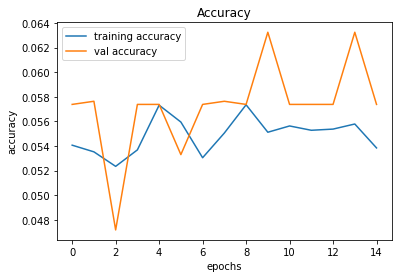

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

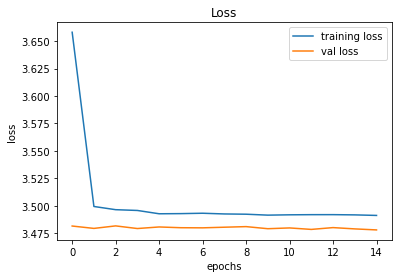

In [12]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
from tensorflow.keras.models import load_model
model.save('traffic_classifier.h5')

In [19]:
from tensorflow.keras.models import load_model
model = load_model('traffic_classifier.h5')